In [2]:
# Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\cease\Documents\Datasets\End to End Projects\New folder\Customer Value Analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   Employment Status              9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [5]:
df = df.drop(columns={'Customer', 'Effective To Date'})

In [6]:
# Define a dictionary with the new column names
new_column_names = {
    'EmploymentStatus' : 'Employment Status'  
}

# Rename columns using the rename method with the dictionary
df = df.rename(columns=new_column_names)

### Categorical columns count 

In [7]:
# Loop through each column and print the count of categorical values
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column data type is object (categorical)
        print(f"Column '{col}' categorical values count:")
        print(df[col].value_counts())
        print()

Column 'State' categorical values count:
State
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: count, dtype: int64

Column 'Response' categorical values count:
Response
No     7826
Yes    1308
Name: count, dtype: int64

Column 'Coverage' categorical values count:
Coverage
Basic       5568
Extended    2742
Premium      824
Name: count, dtype: int64

Column 'Education' categorical values count:
Education
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: count, dtype: int64

Column 'Employment Status' categorical values count:
Employment Status
Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: count, dtype: int64

Column 'Gender' categorical values count:
Gender
F    4658
M    4476
Name: count, dtype: int64

Column 'Location Code' categorical values count:
Location Code
Su

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Employment Status              9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

# Data Preprocessing 

In [9]:
from sklearn.preprocessing import OneHotEncoder

# Create a list of columns to encode
categorical_columns = ['State', 'Employment Status', 'Location Code', 'Marital Status', 'Policy Type', 'Sales Channel', 
                      'Vehicle Class' ]

# Create a copy of the DataFrame with the selected columns
data = df.copy()

# Create an instance of OneHotEncoder
# sparse=False to produce a dense array and drop='first' to drop the first category of each variable
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Iterate through each categorical column

for column in categorical_columns:
    # Fit and transform the selected column
    one_hot_encoded = encoder.fit_transform(data[[column]])

    # Create a DataFrame with one-hot encoded columns
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out([column]))

    # Concatenate the one-hot encoded DataFrame with the original DataFrame
    data = pd.concat([data, one_hot_df], axis=1)

    # Drop the original categorical column
    data = data.drop([column], axis=1)

# Display the resulting DataFrame
df = data.copy()

df.head()

,Customer Lifetime Value,Response,Coverage,Education,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,...,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,No,Basic,Bachelor,F,56274,69,32,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6979.535903,No,Extended,Bachelor,F,0,94,13,42,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12887.431650,No,Premium,Bachelor,F,48767,108,18,38,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7645.861827,No,Basic,Bachelor,M,0,106,18,65,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2813.692575,No,Basic,Bachelor,M,43836,73,12,44,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Encoding 
from sklearn.preprocessing import LabelEncoder

# Creat a list of columns to encode 
columns = ['Response', 'Coverage', 'Education', 'Gender', 'Policy', 'Renew Offer Type', 'Vehicle Size']

# Create a copy of the original dataframe df
data = df.copy()

# Initialize the label encoder 
label_encoders = {}

for col in columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

df = data.copy()

df.head()

,Customer Lifetime Value,Response,Coverage,Education,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,...,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,0,0,0,0,56274,69,32,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6979.535903,0,1,0,0,0,94,13,42,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12887.431650,0,2,0,0,48767,108,18,38,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7645.861827,0,0,0,1,0,106,18,65,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2813.692575,0,0,0,1,43836,73,12,44,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer Lifetime Value          9134 non-null   float64
 1   Response                         9134 non-null   int32  
 2   Coverage                         9134 non-null   int32  
 3   Education                        9134 non-null   int32  
 4   Gender                           9134 non-null   int32  
 5   Income                           9134 non-null   int64  
 6   Monthly Premium Auto             9134 non-null   int64  
 7   Months Since Last Claim          9134 non-null   int64  
 8   Months Since Policy Inception    9134 non-null   int64  
 9   Number of Open Complaints        9134 non-null   int64  
 10  Number of Policies               9134 non-null   int64  
 11  Policy                           9134 non-null   int32  
 12  Renew Offer Type    

## Checking and Removing outliers 

In [12]:
# # Plot box plots for all numeric columns in the DataFrame to identify outliers
# plt.figure(figsize=(12, 8))  # Set the figure size

# # Plot box plots for each numeric column
# sns.boxplot(data=df.select_dtypes(include=['int', 'float']))
# plt.title('Box plots for Numeric Columns')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# plt.tight_layout()  # Adjust layout for better visualization
# plt.show()

### Income

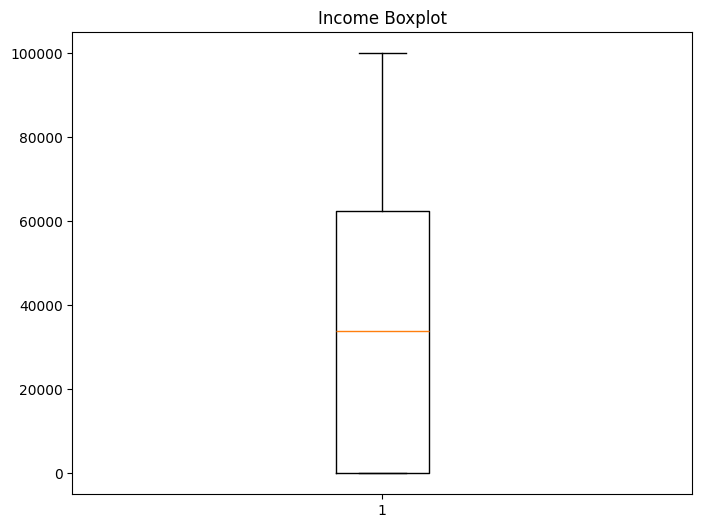

In [13]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Income'])
plt.title('Income Boxplot')
plt.show()

### Customer Lifetime Value

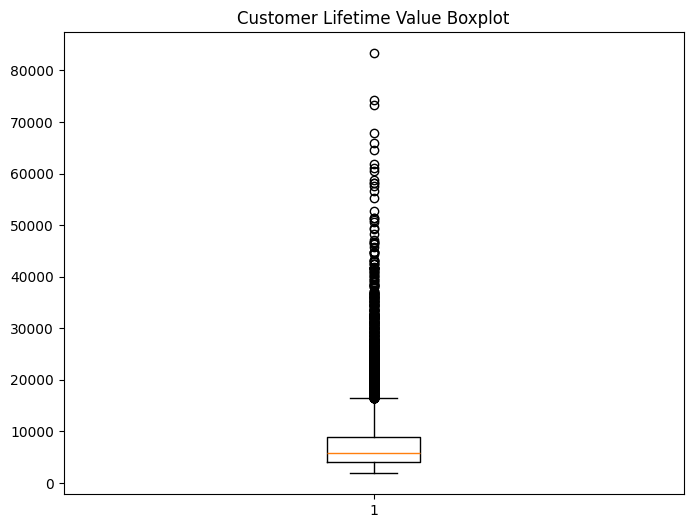

In [14]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value Boxplot')
plt.show()

### Monthly Premium Auto

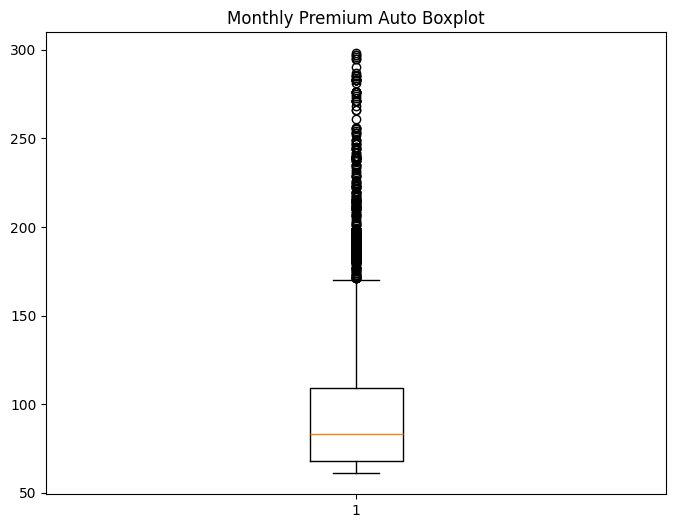

In [15]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Monthly Premium Auto'])
plt.title('Monthly Premium Auto Boxplot')
plt.show()

### Months Since Last Claim

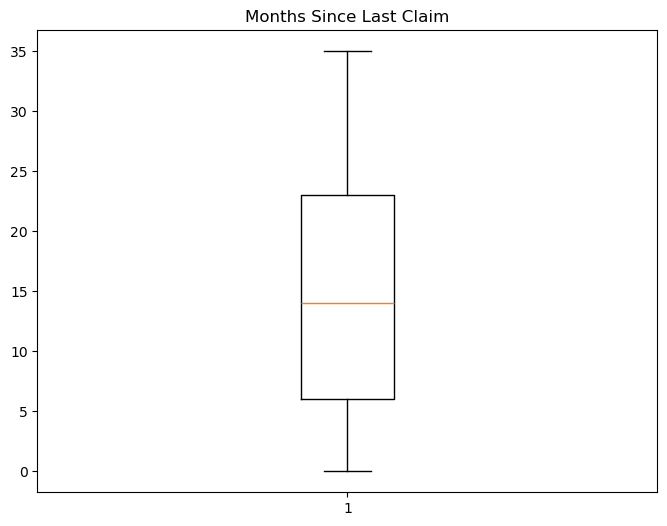

In [15]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Months Since Last Claim'])
plt.title('Months Since Last Claim')
plt.show()

### Months Since Policy Inception

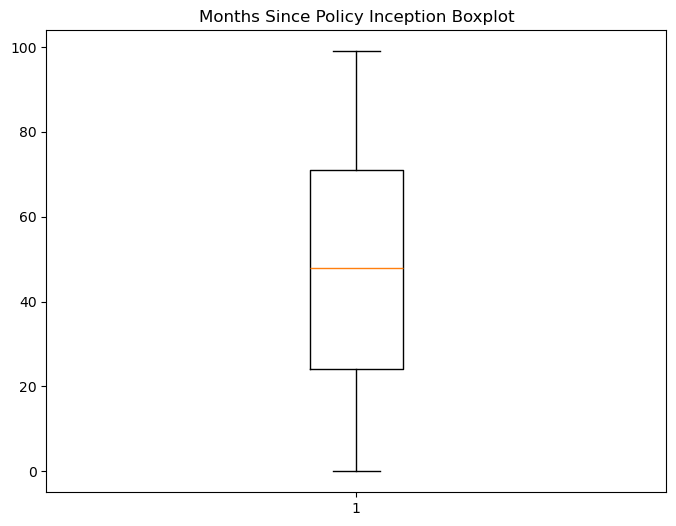

In [16]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Months Since Policy Inception'])
plt.title('Months Since Policy Inception Boxplot')
plt.show()

### Number of Open Complaints

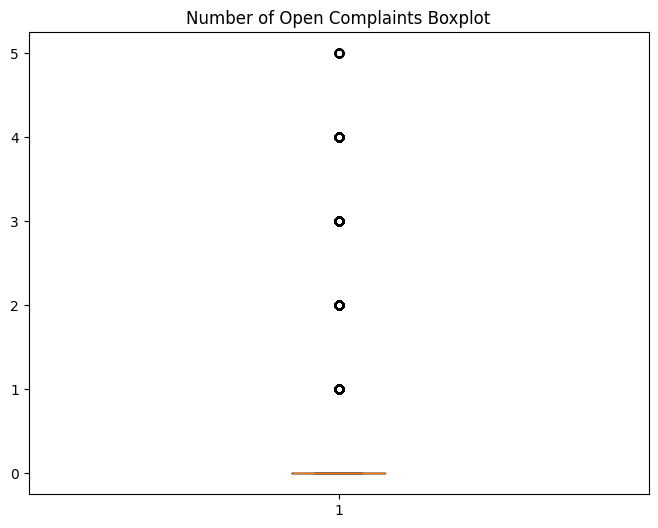

In [16]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Number of Open Complaints'])
plt.title('Number of Open Complaints Boxplot')
plt.show()

### Number of Policies

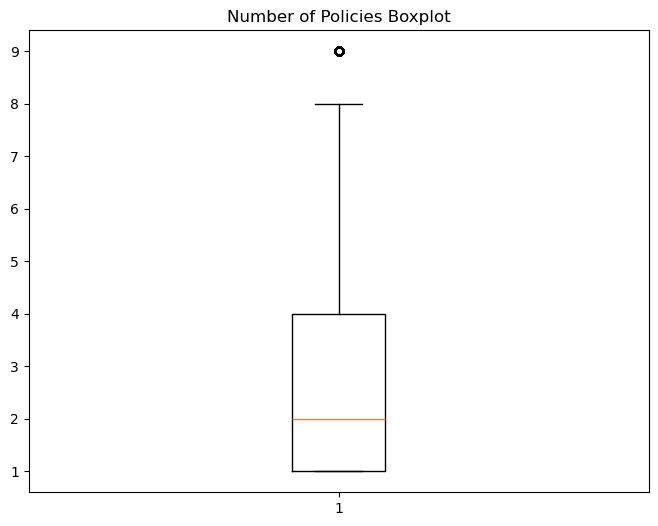

In [18]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Number of Policies'])
plt.title('Number of Policies Boxplot')
plt.show()

### Total Claim Amount

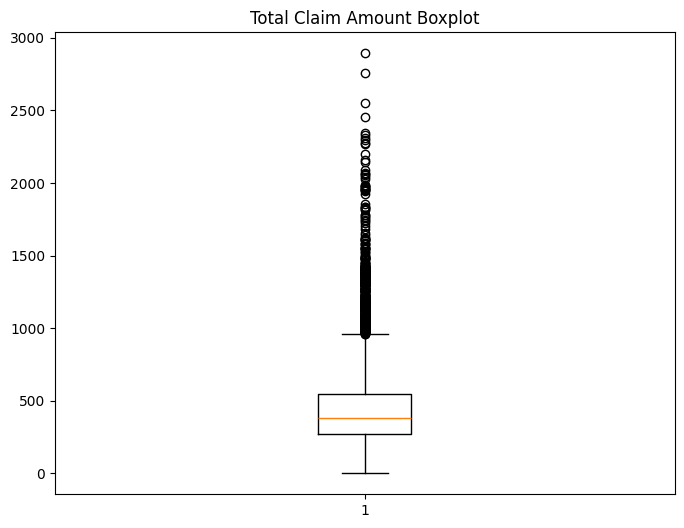

In [17]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Total Claim Amount'])
plt.title('Total Claim Amount Boxplot')
plt.show()

## Removing outliers

In [18]:
def remove_outliers_iqr(df, column_name, threshold=1.5):
    # Calculate quartiles for the specified column
    q25 = df[column_name].quantile(0.25)
    q75 = df[column_name].quantile(0.75)
    iqr = q75 - q25

    # Calculate the lower and upper bounds for outliers using the IQR method
    lower_bound = q25 - threshold * iqr
    upper_bound = q75 + threshold * iqr

    # Filter the DataFrame to remove rows with values outside the lower and upper bounds
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    # Print the number of outliers removed and the size of the filtered DataFrame
    outliers_count = len(df) - len(df_filtered)
    print(f"Number of outliers removed for '{column_name}' using IQR method: {outliers_count}")
    print(f"Size of filtered DataFrame for '{column_name}' using IQR method: {len(df_filtered)}")

    return df_filtered

# Columns for outlier removal
outlier_cols = ['Customer Lifetime Value', 'Monthly Premium Auto', 'Total Claim Amount']

# Perform outlier removal using the IQR method for each column in the list
for col in outlier_cols:
    df = remove_outliers_iqr(df, col)  # Update df with the filtered DataFrame after each iteration

Number of outliers removed for 'Customer Lifetime Value' using IQR method: 817
Size of filtered DataFrame for 'Customer Lifetime Value' using IQR method: 8317
Number of outliers removed for 'Monthly Premium Auto' using IQR method: 301
Size of filtered DataFrame for 'Monthly Premium Auto' using IQR method: 8016
Number of outliers removed for 'Total Claim Amount' using IQR method: 227
Size of filtered DataFrame for 'Total Claim Amount' using IQR method: 7789


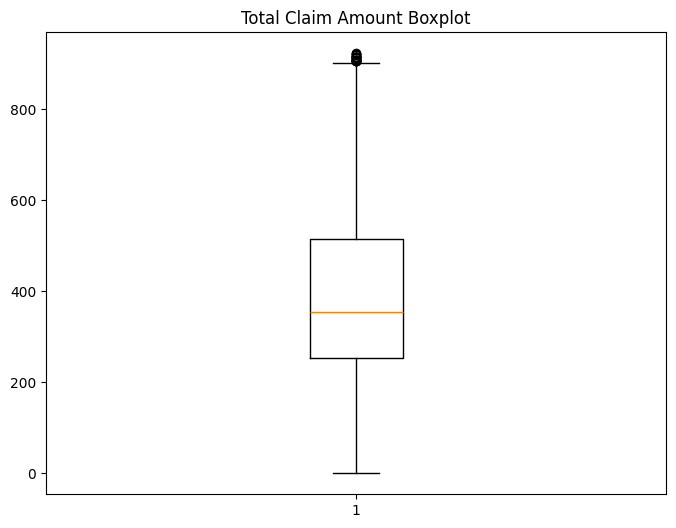

In [19]:
# Assuming your dataframe is named 'df' and the column is named 'Customer Lifetime Value'
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Total Claim Amount'])
plt.title('Total Claim Amount Boxplot')
plt.show()

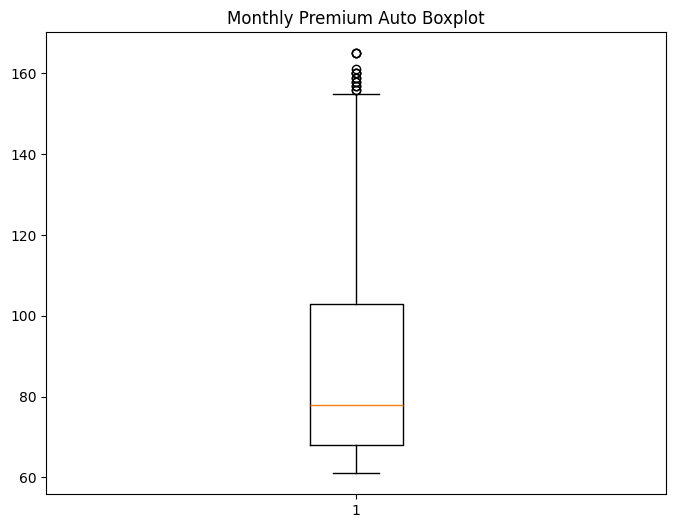

In [20]:
# Assuming your dataframe is named 'df' and the column is named 'Customer Lifetime Value'

plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Monthly Premium Auto'])
plt.title('Monthly Premium Auto Boxplot')
plt.show()

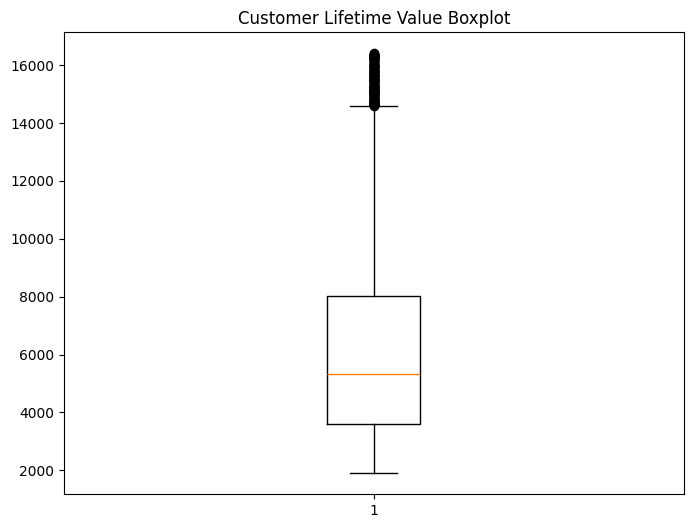

In [21]:
plt.figure(figsize=(8, 6))  # Set figure size for better visualization
plt.boxplot(df['Customer Lifetime Value'])
plt.title('Customer Lifetime Value Boxplot')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7789 entries, 0 to 9133
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Customer Lifetime Value          7789 non-null   float64
 1   Response                         7789 non-null   int32  
 2   Coverage                         7789 non-null   int32  
 3   Education                        7789 non-null   int32  
 4   Gender                           7789 non-null   int32  
 5   Income                           7789 non-null   int64  
 6   Monthly Premium Auto             7789 non-null   int64  
 7   Months Since Last Claim          7789 non-null   int64  
 8   Months Since Policy Inception    7789 non-null   int64  
 9   Number of Open Complaints        7789 non-null   int64  
 10  Number of Policies               7789 non-null   int64  
 11  Policy                           7789 non-null   int32  
 12  Renew Offer Type         

In [23]:
df.head()

,Customer Lifetime Value,Response,Coverage,Education,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,...,Sales Channel_Agent,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,0,0,0,0,56274,69,32,5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12887.431650,0,2,0,0,48767,108,18,38,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7645.861827,0,0,0,1,0,106,18,65,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2813.692575,0,0,0,1,43836,73,12,44,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,8256.297800,1,0,0,0,62902,69,14,94,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
# Now, to convert 'df' to a CSV file, use the to_csv method
#df.to_csv('Insurance Customer Lifetime Value.csv', index=True)

In [24]:

df['Customer Lifetime Value'].unique()

array([ 2763.519279, 12887.43165 ,  7645.861827, ...,  8163.890428,
        7524.442436,  2611.836866])

# Build Model

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Evaluation 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
# Define the featuires and target variable 

# drop null values
df = df.dropna()

# Features 
X = df.drop(columns={'Customer Lifetime Value'})

# Target variable 
y = df['Customer Lifetime Value']

In [28]:
# Training set and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [29]:
# Initialize the standard scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [31]:
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# def model(X_train_scaled, y_train, X_test_scaled, y_test):
#     # Initialize the XGBRegressor model
#     xgb_model = XGBRegressor(n_estimators=30, random_state=42)

#     # Fit the model on the entire training data
#     xgb_model.fit(X_train_scaled, y_train)

#     # Make predictions on the testing data
#     y_pred = xgb_model.predict(X_test_scaled)

#     # Evaluate the model on the testing data
#     mae_test = mean_absolute_error(y_test, y_pred)
#     r2_test = r2_score(y_test, y_pred)
#     mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
#     mse_test = mean_squared_error(y_test, y_pred)
#     rmse_test = np.sqrt(mse_test)

#     # Return the evaluation metrics
#     return mae_test, r2_test, mape_test, mse_test, rmse_test

# # Example usage:
# # Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
# mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

# print("MAE:", mae_test)
# print("R2:", r2_test)
# print("MAPE:", mape_test)
# print("MSE:", mse_test)
# print("RMSE:", rmse_test)

In [32]:
def model(X_train_scaled, y_train, X_test_scaled, y_test):
    # Initialize the XGBRegressor model
    rf_model = RandomForestRegressor()

    # Fit the model on the entire training data
    rf_model.fit(X_train_scaled, y_train)

    # Make predictions on the testing data
    y_pred = rf_model.predict(X_test_scaled)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mape_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train_scaled, y_train, X_test_scaled, and y_test
mae_test, r2_test, mape_test, mse_test, rmse_test = model(X_train_scaled, y_train, X_test_scaled, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MAPE:", mape_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

MAE: 294.80631429785086
R2: 0.9120903200770889
MAPE: 3.3640330069539073
MSE: 844240.9983289362
RMSE: 918.8258803108107


In [34]:
# Feature importance 
# Fit the Random Forest model to training data
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df

,Feature,Importance
9,Number of Policies,0.695377
5,Monthly Premium Auto,0.233598
4,Income,0.011269
12,Total Claim Amount,0.008926
7,Months Since Policy Inception,0.007769
6,Months Since Last Claim,0.007728
1,Coverage,0.003957
2,Education,0.003117
20,Employment Status_Employed,0.002993
10,Policy,0.002945
